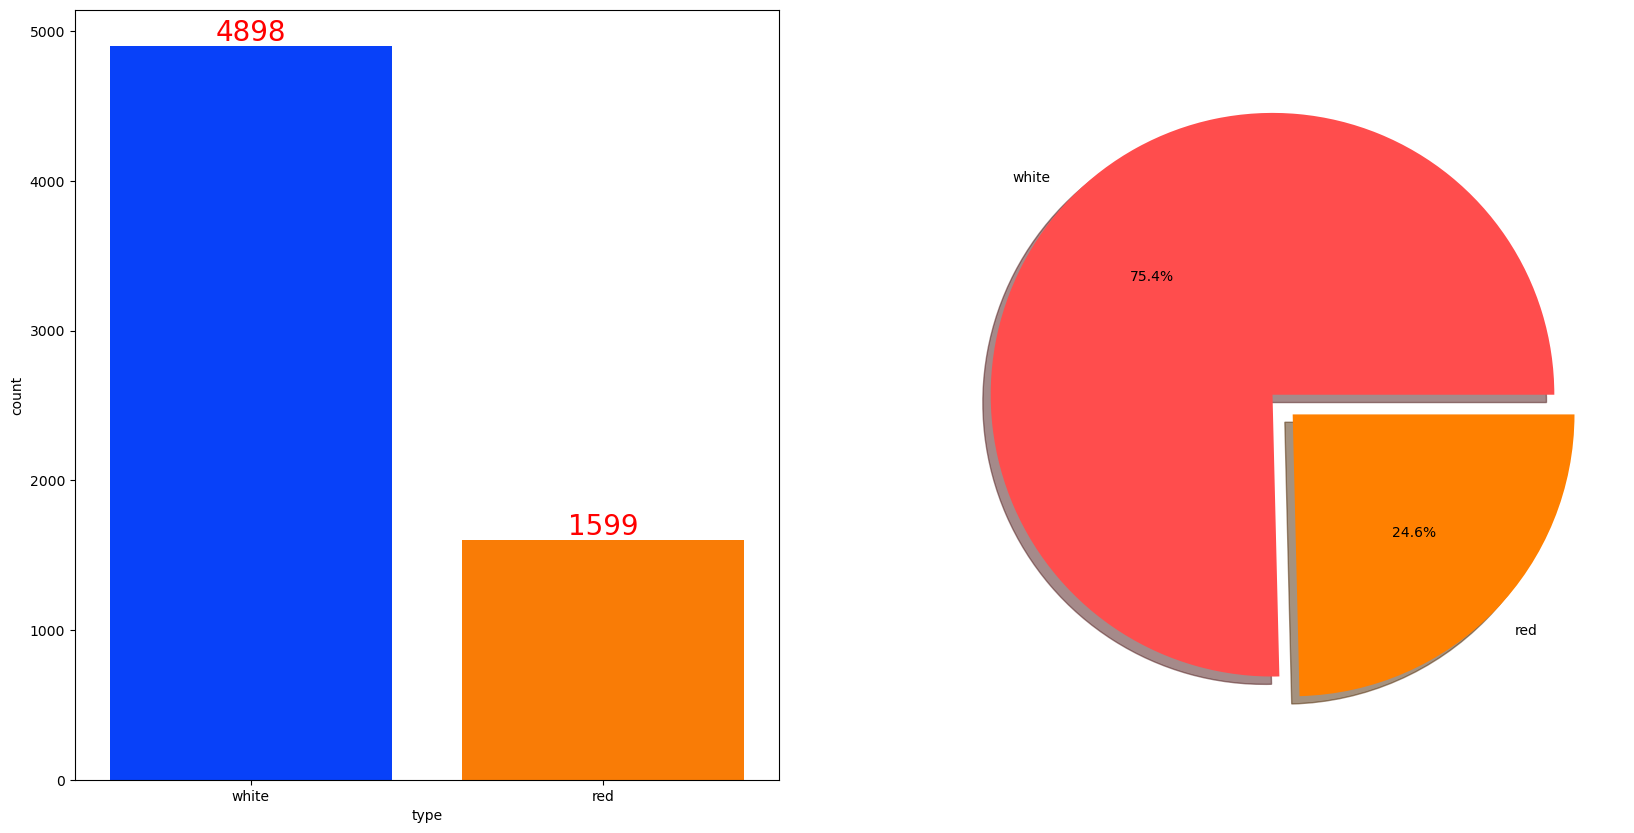

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='red',size=20)
    
plt.pie(x=df['type'].value_counts(),labels=['white','red'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

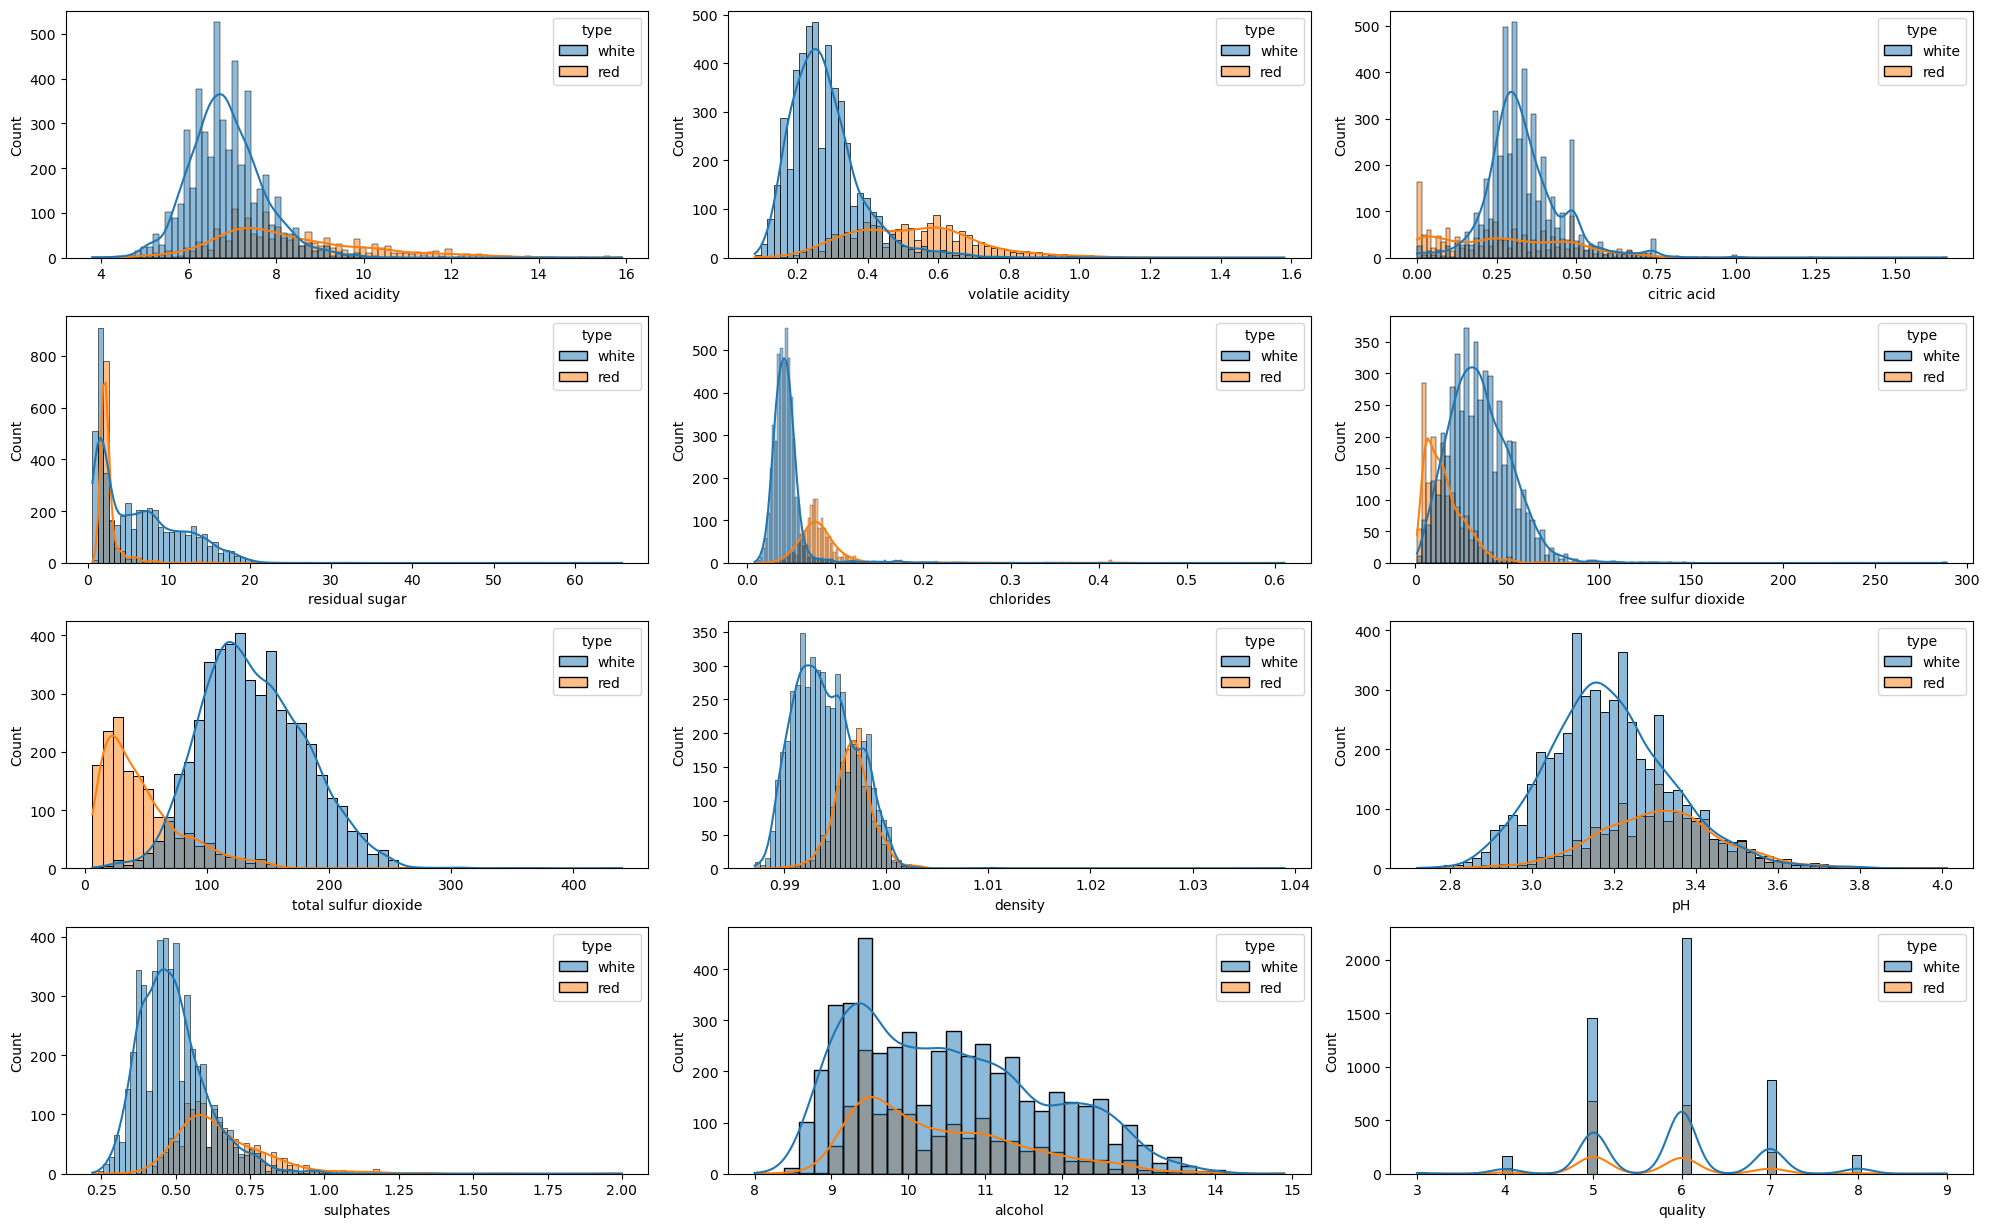

In [39]:
plt.figure(figsize=(20, 15))
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numeric_features[i]],kde=True, hue=df['type'])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

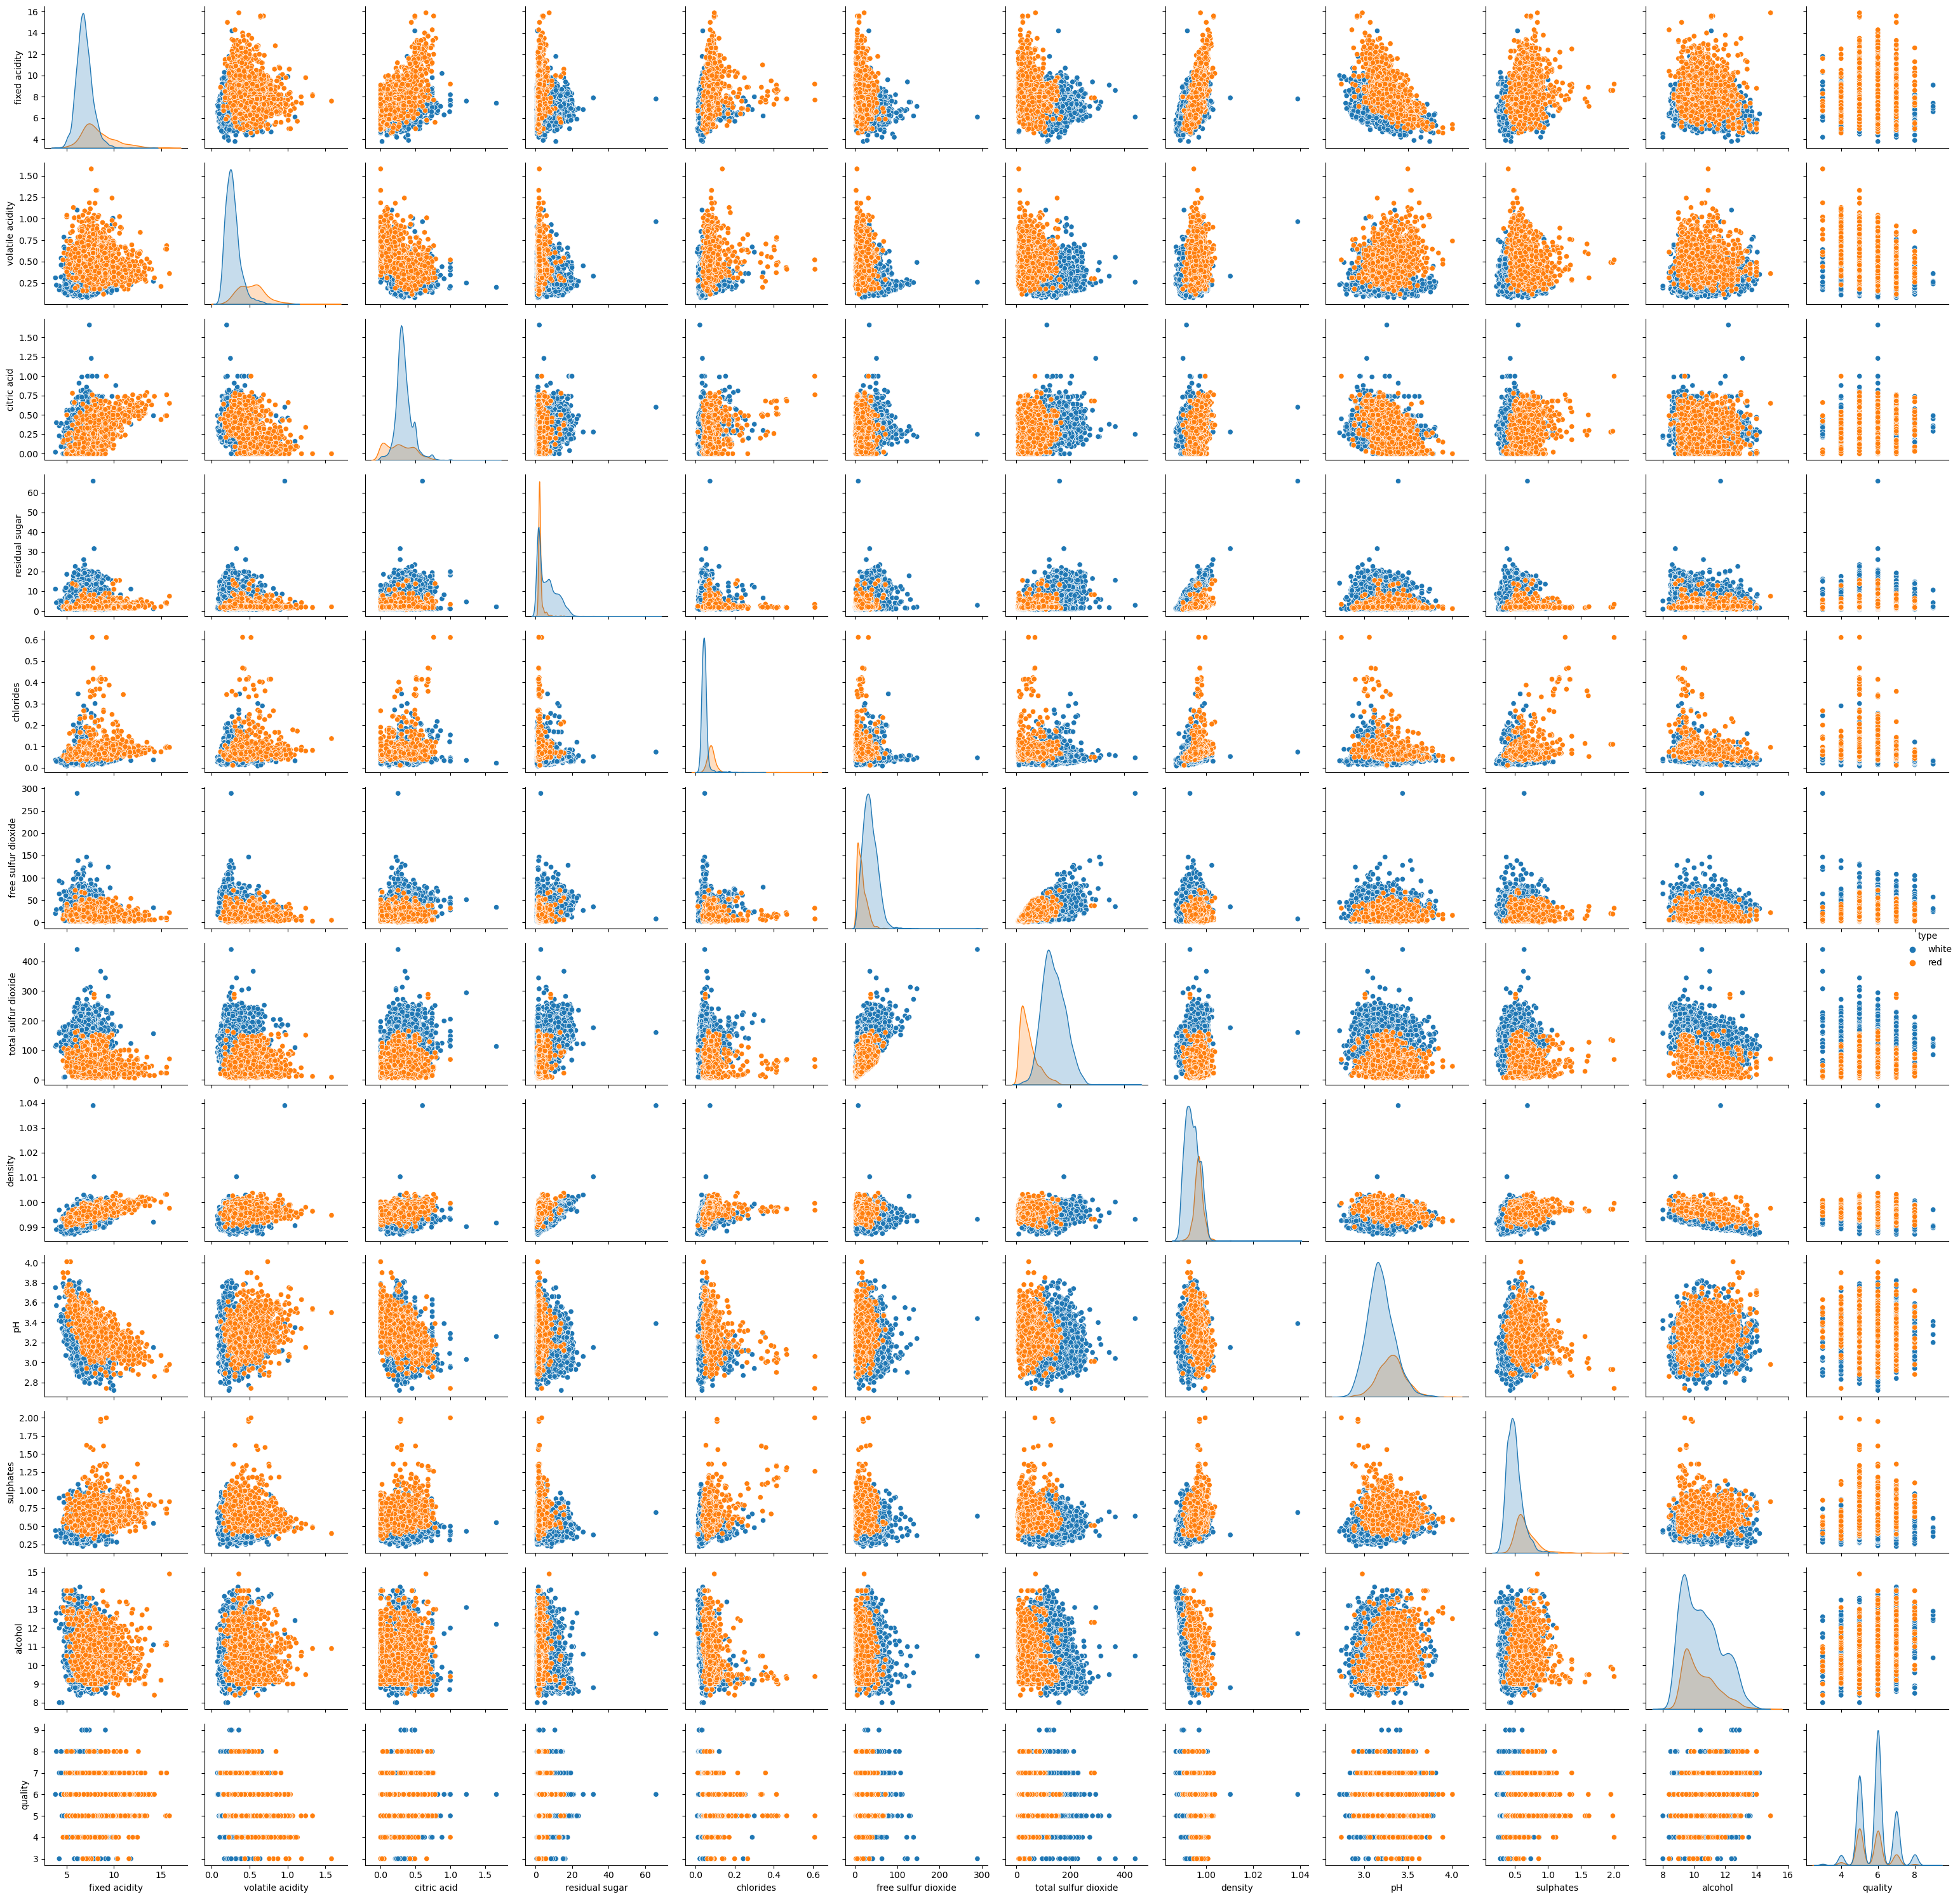

In [40]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='type')
plt.tight_layout()

In [47]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[col]

In [48]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    print(numeric_features[i])
    remove_outliers_IQR(numeric_features[i])
    

fixed acidity
percentile25 6.4
percentile75 7.7
Upper limit 9.65
Lower limit 4.450000000000001
volatile acidity
percentile25 0.23
percentile75 0.4
Upper limit 0.655
Lower limit -0.024999999999999994
citric acid
percentile25 0.25
percentile75 0.39
Upper limit 0.6000000000000001
Lower limit 0.03999999999999998
residual sugar
percentile25 1.8
percentile75 8.1
Upper limit 17.549999999999997
Lower limit -7.6499999999999995
chlorides
percentile25 0.038
percentile75 0.065
Upper limit 0.10550000000000001
Lower limit -0.002500000000000009
free sulfur dioxide
percentile25 17.0
percentile75 41.0
Upper limit 77.0
Lower limit -19.0
total sulfur dioxide
percentile25 77.0
percentile75 156.0
Upper limit 274.5
Lower limit -41.5
density
percentile25 0.99234
percentile75 0.99699
Upper limit 1.003965
Lower limit 0.9853649999999999
pH
percentile25 3.11
percentile75 3.32
Upper limit 3.635
Lower limit 2.795
sulphates
percentile25 0.43
percentile75 0.6
Upper limit 0.855
Lower limit 0.175
alcohol
percentile25 

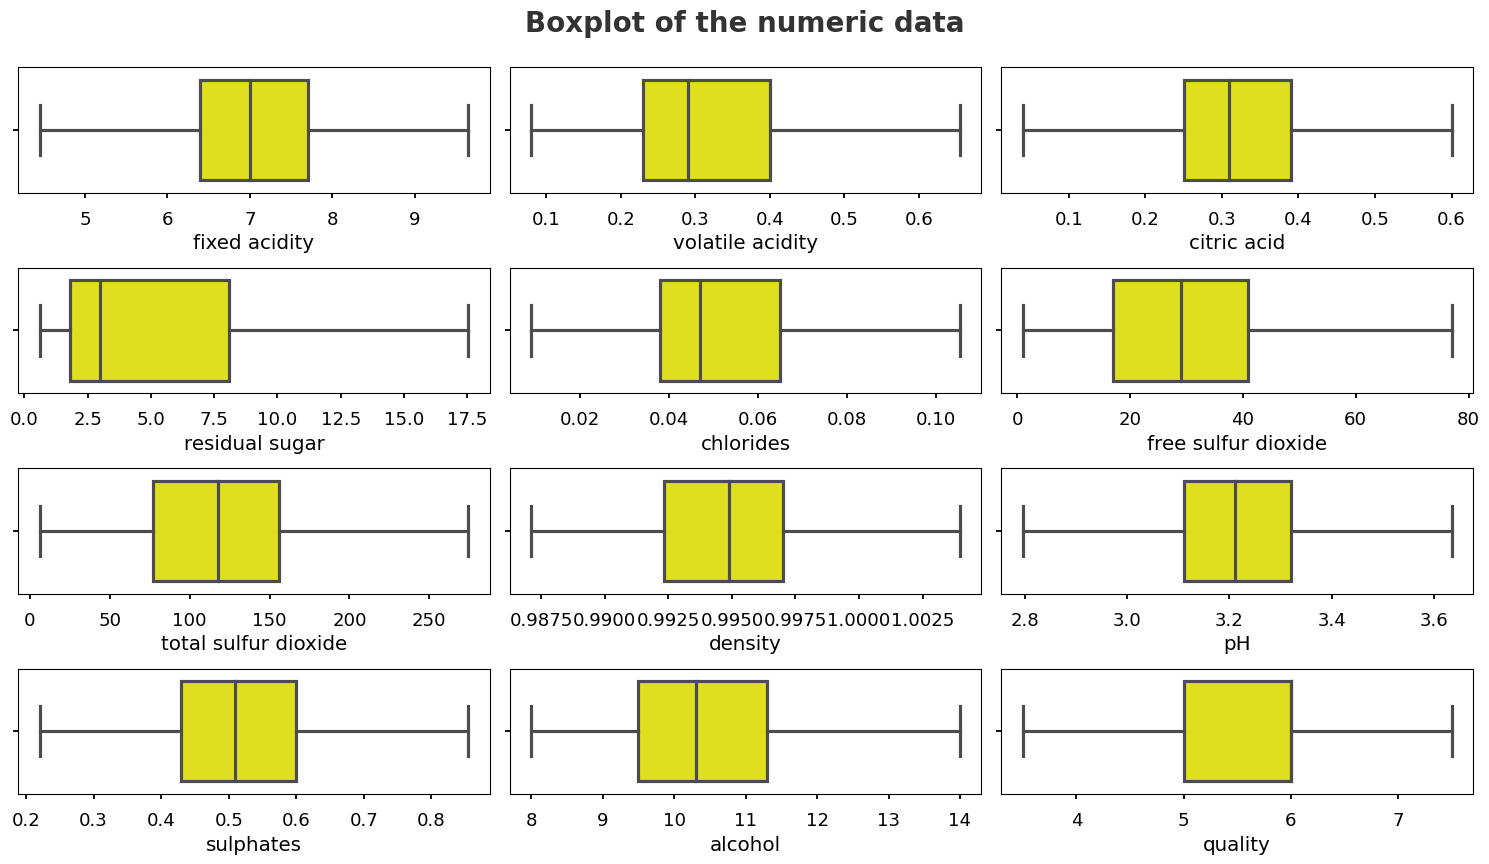

In [49]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot of the numeric data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df1[numeric_features[i]], color='yellow')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [51]:
df1

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36           17.55   
1     white            6.3             0.300         0.34            1.60   
2     white            8.1             0.280         0.40            6.90   
3     white            7.2             0.230         0.32            8.50   
4     white            7.2             0.230         0.32            8.50   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08            2.00   
6493    red            5.9             0.550         0.10            2.20   
6494    red            6.3             0.510         0.13            2.30   
6495    red            5.9             0.645         0.12            2.00   
6496    red            6.0             0.310         0.47            3.60   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8      6.0  
1          0.49      9.5      6.0  
2          0.44     10.1      6.0  
3          0.40      9.9      6.0  
4          0.40      9.9      6.0  
...         ...      ...      ...  
6492       0.58     10.5      5.0  
6493       0.51     11.2      6.0  
6494       0.75     11.0      6.0  
6495       0.71     10.2      5.0  
6496       0.66     11.0      6.0  

[6497 rows x 13 columns]

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop="first")  # Drop the first category (avoid multicollinearity)
# Fit and transform the "wine_type" column
encoded_wine_type = encoder.fit_transform(df1[["type"]])

# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(encoded_wine_type, columns=["types"])

# Concatenate the original DataFrame with the encoded DataFrame
final_df = pd.concat([df1, encoded_df], axis=1)

# Display the first few rows of the final DataFrame
print(final_df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36           17.55   
1  white            6.3              0.30         0.34            1.60   
2  white            8.1              0.28         0.40            6.90   
3  white            7.2              0.23         0.32            8.50   
4  white            7.2              0.23         0.32            8.50   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  types  
0       0.45      8.8      6.0    1.0  
1       0.49      9.5      6.0

In [69]:
data=final_df.drop(['type'], axis=1)

In [60]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

In [70]:
data


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           17.55      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08            2.00      0.090   
6493            5.9             0.550         0.10            2.20      0.062   
6494            6.3             0.510         0.13            2.30      0.076   
6495            5.9             0.645         0.12            2.00      0.075   
6496            6.0             0.310         0.47            3.60      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.51   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  types  
0         8.8      6.0    1.0  
1         9.5      6.0    1.0  
2        10.1      6.0    1.0  
3         9.9      6.0    1.0  
4         9.9      6.0    1.0  
...       ...      ...    ...  
6492     10.5      5.0    0.0  
6493     11.2      6.0    0.0  
6494     11.0      6.0    0.0  
6495     10.2      5.0    0.0  
6496     11.0      6.0    0.0  

[6497 rows x 13 columns]

In [71]:
y = data['quality']
X = data.drop(['quality'], axis=1)


In [76]:
y

0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
6492    5.0
6493    6.0
6494    6.0
6495    5.0
6496    6.0
Name: quality, Length: 6497, dtype: float64

In [74]:
# Step 2: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

# Step 1: Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter tune the Decision Tree using RandomizedSearchCV
dt_classifier = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_dt_model = random_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Step 4: Grow a Random Forest
# Create 10 subsets using ShuffleSplit
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Train 1 Decision Tree on each subset
forest = []
for train_index, _ in ss.split(X_train):
    subset_X_train, subset_y_train = X_train[train_index], y_train[train_index]
    tree = DecisionTreeClassifier(**best_params)
    tree.fit(subset_X_train, subset_y_train)
    forest.append(tree)

# Evaluate all the trees on the test dataset
forest_predictions = np.array([tree.predict(X_test) for tree in forest])
forest_predictions_majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=forest_predictions)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, forest_predictions_majority_vote)
print("Accuracy of Random Forest:", accuracy_rf)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 18}
Accuracy of Decision Tree: 0.9444444444444444
Accuracy of Random Forest: 1.0


In [75]:
# Step 3: Hyperparameter tune the Decision Tree using RandomizedSearchCV
dt_classifier = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_dt_model = random_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Step 4: Grow a Random Forest
# Create 10 subsets using ShuffleSplit
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Train 1 Decision Tree on each subset
forest = []
for train_index, _ in ss.split(X_train):
    subset_X_train, subset_y_train = X_train[train_index], y_train[train_index]
    tree = DecisionTreeClassifier(**best_params)
    tree.fit(subset_X_train, subset_y_train)
    forest.append(tree)

# Evaluate all the trees on the test dataset
forest_predictions = np.array([tree.predict(X_test) for tree in forest])
forest_predictions_majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=forest_predictions)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, forest_predictions_majority_vote)
print("Accuracy of Random Forest:", accuracy_rf)

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of DecisionTreeClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 284, in _fit
    check_classification_targets(y)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 215, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
